In [246]:
# Data Analysis and Cleaning

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [288]:
df = pd.read_csv("2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")

In [290]:
list(df.columns)

['User ID',
 'Fan Challenges Completed',
 'Predictive Accuracy (%)',
 'Virtual Merchandise Purchases',
 'Sponsorship Interactions (Ad Clicks)',
 'Time on Live 360 (mins)',
 'Real-Time Chat Activity (Messages Sent)']

In [292]:
df.rename(columns={'User ID' : 'ID', 'Predictive Accuracy (%)' : 'Predictive Accuracy', 'Sponsorship Interactions (Ad Clicks)' : 'Sponsorship Interactions', 'Time on Live 360 (mins)' : 'Time on Live 360', 'Real-Time Chat Activity (Messages Sent)' : 'Real-Time Chat Activity'}, inplace = True)

In [294]:
df.head()

,ID,Fan Challenges Completed,Predictive Accuracy,Virtual Merchandise Purchases,Sponsorship Interactions,Time on Live 360,Real-Time Chat Activity
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [296]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             100 non-null    object
 1   Fan Challenges Completed       100 non-null    int64 
 2   Predictive Accuracy            100 non-null    int64 
 3   Virtual Merchandise Purchases  100 non-null    int64 
 4   Sponsorship Interactions       100 non-null    int64 
 5   Time on Live 360               100 non-null    int64 
 6   Real-Time Chat Activity        100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


,Fan Challenges Completed,Predictive Accuracy,Virtual Merchandise Purchases,Sponsorship Interactions,Time on Live 360,Real-Time Chat Activity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [298]:
duplicateRows = df.duplicated()
print(duplicateRows.sum())

0


In [300]:
countsVMP = df["Virtual Merchandise Purchases"].value_counts();

In [302]:
# Investigate Trends

In [304]:
# Which users are most likely to purchase virtual merchandise?

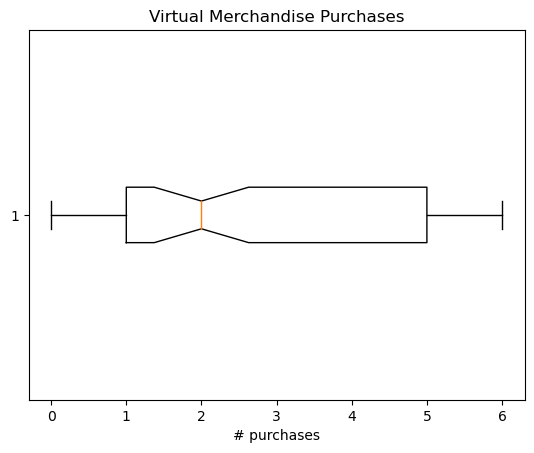

In [306]:
plt.boxplot(df["Virtual Merchandise Purchases"], vert=False, notch=True)
plt.title("Virtual Merchandise Purchases")
plt.xlabel("# purchases")
plt.show()

In [308]:
groupedVMP = df.groupby(["Virtual Merchandise Purchases"]).sum()

totalFanChallenges = groupedVMP.loc[:, "Fan Challenges Completed"]
totalPredictiveAccuracy = groupedVMP.loc[:, "Predictive Accuracy"]
totalSponsorship = groupedVMP.loc[:, "Sponsorship Interactions"]
totalLive360 = groupedVMP.loc[:, "Time on Live 360"]
totalChat = groupedVMP.loc[:, "Real-Time Chat Activity"]

In [310]:
# Virtual Merchandise Purchases and total Fan Challenges Completed
# mean: 2.67
# median: 2

print("with total fan challenges")
for i in range(len(countsVMP)):
    print(totalFanChallenges[i]/countsVMP[i])

print("with total predictive accuracy")
for i in range(len(countsVMP)):
    print(totalPredictiveAccuracy[i]/countsVMP[i])

print("with total sponsorship interactions")
for i in range(len(countsVMP)):
    print(totalSponsorship[i]/countsVMP[i])

print("with total time on Live 360")
for i in range(len(countsVMP)):
    print(totalLive360[i]/countsVMP[i])

print("with total real-time chat activity")
for i in range(len(countsVMP)):
    print(totalChat[i]/countsVMP[i])


with total fan challenges
5.4
5.142857142857143
5.705882352941177
5.764705882352941
5.833333333333333
6.333333333333333
6.642857142857143
with total predictive accuracy
75.95
73.71428571428571
74.29411764705883
74.17647058823529
80.33333333333333
69.58333333333333
79.07142857142857
with total sponsorship interactions
6.85
7.571428571428571
11.647058823529411
9.352941176470589
9.5
5.333333333333333
10.5
with total time on Live 360
124.05
121.5
140.8235294117647
138.58823529411765
130.5
127.66666666666667
120.57142857142857
with total real-time chat activity
25.6
20.428571428571427
28.352941176470587
28.88235294117647
27.333333333333332
20.0
23.571428571428573


In [312]:
# Positive Correlation Between Virtual Merchandise Purchases and Fan Challenges Completed
# Those most likely to purchase virtual merchandise tended to have...
# slightly lower total predictive accuracy
# slightly more time on Live 360
# slightly more total real-time chat activity

In [314]:
#----------------------------------------------------

In [316]:
# How do user activities during race events correlate with their merchandise purchases and sponsorship interaction?

In [342]:
correlationMatrix = df.corr(method = "pearson")
round(correlationMatrix, 3)

,Fan Challenges Completed,Predictive Accuracy,Virtual Merchandise Purchases,Sponsorship Interactions,Time on Live 360,Real-Time Chat Activity
Fan Challenges Completed,1.000,-0.106,0.159,-0.065,0.003,0.008
Predictive Accuracy,-0.106,1.000,0.022,0.057,0.125,0.024
Virtual Merchandise Purchases,0.159,0.022,1.000,0.071,-0.008,-0.045
Sponsorship Interactions,-0.065,0.057,0.071,1.000,-0.074,0.191
Time on Live 360,0.003,0.125,-0.008,-0.074,1.000,0.051
Real-Time Chat Activity,0.008,0.024,-0.045,0.191,0.051,1.000


In [344]:
# Merchandise Purchases
# Slightly positive linear relationship between purchases and fan challenges completed

In [346]:
# Sponsorship Interaction
# Slightly positive linear relationship between sponsorship interaction and real-time chat activity

In [442]:
# K-Means Clustering
# scaling data
from sklearn.preprocessing import StandardScaler

# models
from sklearn.cluster import KMeans

In [444]:
correlationOne = df[["Fan Challenges Completed", "Virtual Merchandise Purchases"]]
correlationOneScaled = StandardScaler().fit_transform(correlationOne)

In [446]:
correlationTwo = df[["Real-Time Chat Activity", "Sponsorship Interactions"]]
correlationTwoScaled = StandardScaler().fit_transform(correlationTwo)

In [452]:
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(correlationOne)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Users/colleenl/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


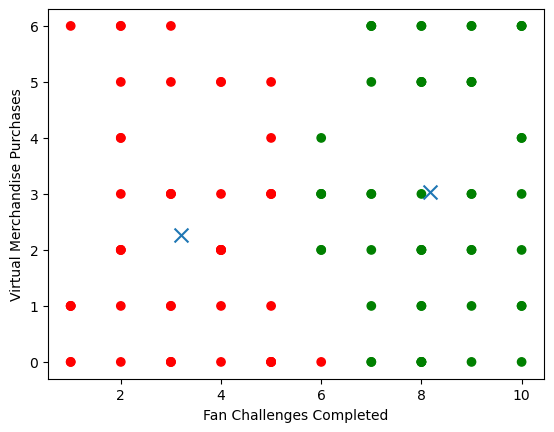

In [454]:
colors = np.array(["r", "g"])

plt.scatter(df["Fan Challenges Completed"], df["Virtual Merchandise Purchases"], c = colors[labels])
plt.xlabel("Fan Challenges Completed")
plt.ylabel("Virtual Merchandise Purchases")

plt.scatter(centroids[:,0], centroids[:,1], s = 100, marker = "x")

In [456]:
kmeansTwo = KMeans(n_clusters = 2, random_state = 1)
kmeansTwo.fit(correlationTwo)

labelsTwo = kmeansTwo.labels_
centroidsTwo = kmeansTwo.cluster_centers_


/Users/colleenl/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


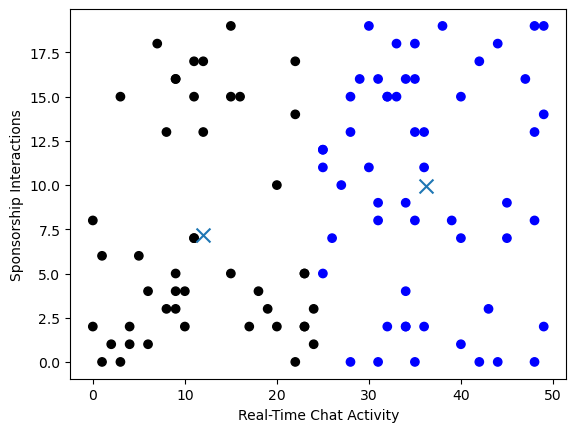

In [458]:
colors = np.array(["b", "k"])

plt.scatter(df["Real-Time Chat Activity"], df["Sponsorship Interactions"], c = colors[labelsTwo])
plt.xlabel("Real-Time Chat Activity")
plt.ylabel("Sponsorship Interactions")

plt.scatter(centroidsTwo[:,0], centroidsTwo[:,1], s = 100, marker = "x")

In [ ]:
# Data Visualization

/Users/colleenl/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


PearsonRResult(statistic=0.15937847401449023, pvalue=0.11321894165657136)

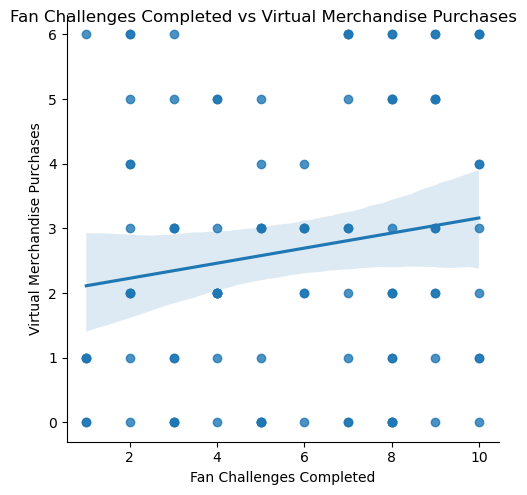

In [364]:
challengesAndPurchases = sns.lmplot(x = "Fan Challenges Completed", y = "Virtual Merchandise Purchases", data = df)
figure = challengesAndPurchases.fig
figure.suptitle("Fan Challenges Completed vs Virtual Merchandise Purchases")
stats.pearsonr(df["Fan Challenges Completed"], df["Virtual Merchandise Purchases"])

/Users/colleenl/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


PearsonRResult(statistic=0.19129242782519598, pvalue=0.05658277958218566)

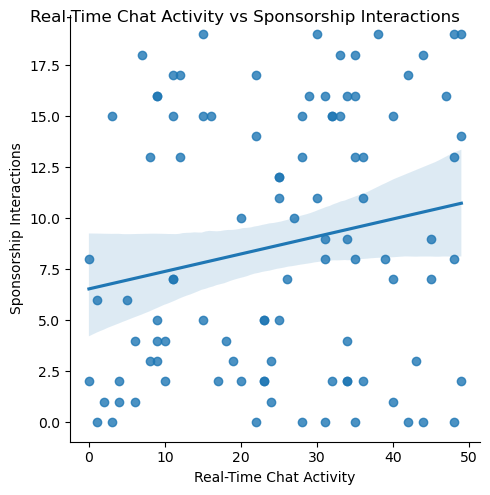

In [370]:
sponsorshipAndChat = sns.lmplot(x = "Real-Time Chat Activity", y = "Sponsorship Interactions", data = df)
figure = sponsorshipAndChat.fig
figure.suptitle("Real-Time Chat Activity vs Sponsorship Interactions")
stats.pearsonr(df["Real-Time Chat Activity"], df["Sponsorship Interactions"])

In [ ]:
# Proposal:
# A new fan challenge that would influence participants to use real-time chat activity would increase the sponsorship interactions.
# More challenges that engage the participants would likely increase sponsorship interactions as well as merchandise purchases.
# There would be able 3 more sponsorship interactions than usual and an additional merchandise purchase.